In [1]:
import math

import numpy as np
import cv2

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

image = cv2.imread('./edda.png')

In [34]:

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixels = image_rgb.reshape(-1, 3)

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pixels)

colors = kmeans.cluster_centers_

lables = kmeans.predict(pixels)

segmented_image = lables.reshape(image_rgb.shape[:2])

num_rows = math.ceil(num_clusters / 2)
# Plot the results
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 24))

# Original Image
# axes[0].imshow(image_rgb)
# axes[0].set_title('Original Image')
# axes[0].axis('off')


for r in range(num_clusters):
    # Segmented Image by color clusters
    segmented_image_colored = np.zeros_like(image_rgb)
    # for i in range(num_clusters):
    segmented_image_colored[segmented_image == r] = colors[r]
    
    row = r % num_rows
    col = math.floor(r / num_rows)
    # print(r, col, row, axes.size)
    axes[row][col].imshow(segmented_image_colored)
    
    cv2.imwrite(f'./output/kmeans/edda_kmeans_r{row}_c{col}.png', cv2.cvtColor(segmented_image_colored, cv2.COLOR_RGB2BGR))

    # axes[col][row].set_title(f'Segmented Image with {num_clusters} Color Groups')
    # axes[col][row].axis('off')

plt.show()

KeyboardInterrupt: 

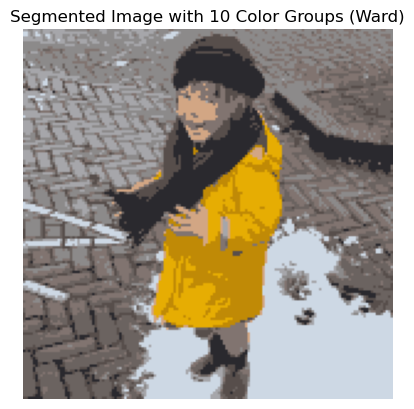

In [6]:
from sklearn.cluster import AgglomerativeClustering

image_resized = cv2.resize(image, (200,200), interpolation=cv2.INTER_AREA)
image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
pixels = image_rgb.reshape(-1, 3)
# Apply Agglomerative Clustering with Ward's method to find color groups
num_clusters = 10  # Set the number of color groups you want
ward_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
ward_clustering.fit(pixels)

# Get the cluster labels
labels = ward_clustering.labels_

# Reshape the labels back to the original image shape
segmented_image = labels.reshape(image_rgb.shape[:2])

# Create an empty image to store the segmented colors
segmented_image_colored = np.zeros_like(image_rgb)

# Assign the color of each cluster to the corresponding pixels
for i in range(num_clusters):
    
    # Segmented Image by color clusters
    segmented_image_colored = np.zeros_like(image_rgb)
    cluster_color = np.mean(pixels[labels == i], axis=0)
    segmented_image_colored[segmented_image == i] = cluster_color
    
    cv2.imwrite(f'./output/ward/segmented_image_ward_{i}.png', cv2.cvtColor(segmented_image_colored, cv2.COLOR_RGB2BGR))

    # Segmented Image by color clusters
segmented_image_colored = np.zeros_like(image_rgb)

# Assign the color of each cluster to the corresponding pixels
for i in range(num_clusters):
    cluster_color = np.mean(pixels[labels == i], axis=0)
    segmented_image_colored[segmented_image == i] = cluster_color


# Save the segmented image as a PNG (convert RGB to BGR for OpenCV compatibility)
cv2.imwrite('./output/ward/segmented_image_ward.png', cv2.cvtColor(segmented_image_colored, cv2.COLOR_RGB2BGR))

# Optionally, display the result
plt.imshow(segmented_image_colored)
plt.title(f'Segmented Image with {num_clusters} Color Groups (Ward)')
plt.axis('off')  # Hide the axis
plt.show()
